In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Edgelist txt data successfully loaded into a networkx Graph!
75
114
Name: 
Type: Graph
Number of nodes: 75
Number of edges: 114
Average degree:   3.0400
0.24774774774774772


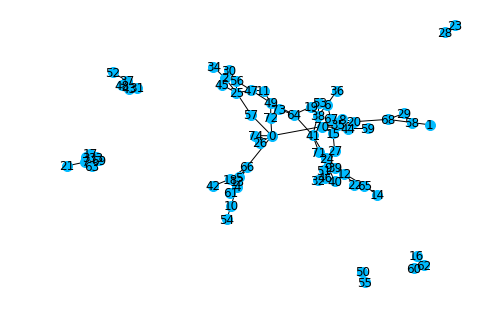

In [10]:
class LoadFromFile(object):
    def __init__(self):
        '''
        Initiate variables for the class.
        '''
        self.g = nx.Graph()
        pass

    def from_edgelist(self, path):
        '''
        Read graph in edgelist txt format from `path`.
        Parameters
        ----------
        path: `str`
            The path to the edgelist text file. Note that the node index must start from 0.
        Returns
        -------
        G: `NetworkX graph`
            The parsed graph.
        '''

        edgelist = []
        with open(path, 'r') as f:
            for line in f:
                node_pair = line.replace('\n', '').split('\t')
                edgelist += [node_pair]
        return edgelist
                
    def from_in_class_network(self, edgelist):
        id_num=np.zeros(len(edgelist)-1, dtype=np.int)
        acq=[0 for i in range(len(edgelist)-1)]
        for i in range(1,len(edgelist)):
            for j in range(2):
                edgelist[i][j]=edgelist[i][j].replace(' ','0')
                if j==0:
                    id_num[i-1]=int(edgelist[i][j])
                elif j==1:
                    acq[i-1]=list(map(int,edgelist[i][j].split(',')))
        edgelist_ok=[[0 for j in range(2)] for i in range(141)]
        k=0
        for i in range(len(edgelist)-1):
            for j in range(len(acq[i])):
                edgelist_ok[k][0]=id_num[i]
                edgelist_ok[k][1]=acq[i][j]
                k=k+1
        for i in range(len(edgelist_ok)):
            edgelist_ok[i]=tuple(edgelist_ok[i])
        self.g.add_edges_from(edgelist_ok)
        print('Edgelist txt data successfully loaded into a networkx Graph!')
        print(self.g.order())
        print(self.g.size())
        print(nx.info(self.g))
        closeness=nx.closeness_centrality(self.g)
        print(max(closeness.values()))
        nx.draw(self.g, node_size = 100,with_labels = True,node_color = '#00BBFF')
        '''
        make the edgelist into 2-tuple in order to be processed in networkx
        Parameters
        ----------
        id_num: array of id
        acq: list of IDs-of-acquaintances
        
        Returns
        -------
        G: `NetworkX graph`
            The parsed graph.
        edgelist_ok: the list in 2-tuple of every pair of acquaintances
        
        '''
G=LoadFromFile()
G.from_in_class_network(G.from_edgelist('In-class_network.txt'))


Name: 
Type: Graph
Number of nodes: 74
Number of edges: 2701
Average degree:  73.0000
e/e_max= 0.042206590151795634


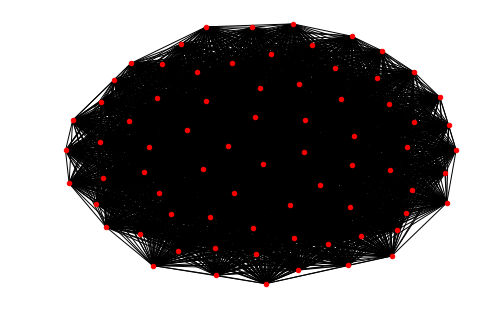

In [11]:
import itertools

G=nx.Graph()
e_max_list=itertools.combinations(range(1,75),2)
#print(list(e_max))
G.add_edges_from(e_max_list)
print(nx.info(G))
e_max=G.size()
print("e/e_max=",float(114/e_max))
nx.draw(G, node_size = 20)